# メモ Todo 
## 下がる、下がらないのベルーヌーイ分布で確率をだす。
## poisson分布
$ e=

# フロー
1. 変数の定義
1. 過去のCSVファイルからデータをロードする
1. 前処理モジュールの定義（当日の上昇率、過去からの上昇率、下降率）
1. CSVロードして、並び替え、必要な日付からにする
1. 前処理部分(現在の値と、過去のからの上昇率、下降率を記したDFを作成)
1. 前処理データの保存

# 変数の定義


In [1]:
# 変数の定義
import pandas as pd
import pandas_profiling as pdp

pram_predict_day=1                   # 1日後の予測をする
#pram_predict_plus_percent=0.70            # 70%で上昇率、下降の設定
#pram_predict_minus_percent=0.20           # 40%で上昇率、下降の設定
pram_predict_plus_percent=0.40             # 40%で上昇率、下降の設定
pram_predict_minus_percent=0.40            # 40%で上昇率、下降の設定

YEAR=""
start_date='2000-01-29'             #元データを2000年からにする

# 過去のCSVファイルからデータをロードする


In [2]:
# 過去のCSVファイルからデータをロードする

class load_csv:
    #CSVは右記サイトのからダウンロード https://stooq.com/q/d/?s=zarjpy
    import pandas as pd
    
    def load(self):
        #df_fx=pd.read_csv('data/zarjpy_d.csv')
        df_fx=pd.read_csv('data/fx_latest.csv')
        df_fx=df_fx.ix[:,['Date','Open','Close']]
        
        print ("配列長さ:",len(df_fx))
        return df_fx

# 前処理モジュールの定義（当日の上昇率、過去からの上昇率、下降率）


In [3]:
# 偏差値
def Deviation_value(df_tmp,x):
    std=df_tmp.std()['Open']

    mean=df_tmp.mean()['Open']
    deviation=(mean-x)*10/std+50

    return deviation


In [4]:
# 前処理モジュールの定義（当日の上昇率、過去からの上昇率、下降率）


def result(day0,xday):          #day0 当日の上昇率(close/open)の結果を返す
    rate=0  #上昇率
    if ((i-xday)>=0 and data_len>(i-xday)): 
        rate= ((df_fx.iloc[i,close_index]/df_fx.iloc[i,open_index])-1)*100
    return rate

def persent(day0,xday):         #　当日のopen価格と、過去のと比較して上昇率(当日open/過去open)を返す
    rate=0  #上昇率
    if ((i-xday)>=0 and data_len>(i-xday)):        
        rate= ((df_fx.iloc[i,open_index]/df_fx.iloc[i-xday,open_index])-1)*100
        if rate <0:
            rate=0
        #rate=np.log10(rate)
    return rate

def persent_minus(day0,xday):   #　当日のopen価格と、過去のと比較して下降率(-当日open/過去open)を返す
    rate=0  #上昇率
    if ((i-xday)>=0 and data_len>(i-xday)):        
        rate= ((df_fx.iloc[i,open_index]/df_fx.iloc[i-xday,open_index])-1)*100
        if rate>0:
            rate=0
        #rate=np.log10(rate)
    return rate

# CSVロードして、並び替え、必要な日付からにする


In [5]:
LOAD_CSV=load_csv()
df_fx=LOAD_CSV.load()
#df_fx=df_fx.sort_values(by='Date')

df_fx=df_fx[(df_fx['Date']>=start_date )]
df_fx = df_fx.reset_index(drop=True)
data_len=len(df_fx)

df_fx.tail(10)

配列長さ: 4934


/Users/fujiccofujimoto/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


,Date,Open,Close
4924,2019-10-08,7.038,7.003
4925,2019-10-09,6.982,7.080
4926,2019-10-10,7.059,7.163
4927,2019-10-11,7.152,7.330
4928,2019-10-14,7.314,7.302
4929,2019-10-15,7.287,7.306
4930,2019-10-16,7.294,7.273
4931,2019-10-17,7.252,7.320
4932,2019-10-18,7.300,7.330
4933,2019-10-21,7.309,7.350


In [6]:
df=pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
df = pd.DataFrame(index=['Date'], columns=[
"Date" ,"Close","Open",
"day+1" ,"day+2" ,"day+3",
"day+4" ,"day+5" ,"day+6",
"day+7" ,"day+8" ,"day+9",
"day+10","day+11","day+12",
"day+13","day+14","day+15",
"day+16","day+17","day+18",
"day+19","day+20","day+21",
"day+22","day+23","day+24",
"day+25","day+26","day+27",
"day+28","day+29","day+30",

"day-1" ,"day-2" ,"day-3",
"day-4" ,"day-5" ,"day-6",
"day-7" ,"day-8" ,"day-9",
"day-10","day-11","day-12",
"day-13","day-14","day-15",
"day-16","day-17","day-18",
"day-19","day-20","day-21",
"day-22","day-23","day-24",
"day-25","day-26","day-27",
"day-28","day-29","day-30",
    
"std-30","std-60","std-90",
    

"label_up","label_none","label_down",
#"label2_up","label2_down"
])

In [7]:
date_index=df_fx.columns.get_loc('Date')
close_index=df_fx.columns.get_loc('Close')
open_index=df_fx.columns.get_loc('Open')

df_fx.head(8)

,Date,Open,Close
0,2000-08-29,15.31,15.2400
1,2000-08-30,15.19,15.3103
2,2000-08-31,15.28,15.2866
3,2000-09-01,15.28,15.2562
4,2000-09-04,15.22,15.1945
5,2000-09-05,15.19,15.0723
6,2000-09-06,15.06,14.9275
7,2000-09-07,14.91,14.8175


# 前処理部分　（現在の値と、過去のからの上昇率、下降率を記したDFを作成）



In [8]:
df.tail(30)


,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,...,day-27,day-28,day-29,day-30,std-30,std-60,std-90,label_up,label_none,label_down
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# 前処理部分　（現在の値と、過去のからの上昇率、下降率を記したDFを作成
for i in range(data_len) :
    Date_day=df_fx.iloc[i,date_index ]

    if i%100==0:
        print('{0:.1%}'.format(i/data_len),end=" ")

    #当日のOPENの株価
    day0         =df_fx.iloc[i,open_index]
    day0_open    =df_fx.iloc[i,open_index] 
    day0_close   =df_fx.iloc[i,close_index] 

    #その後の結果から正解ラベルを作成
    label_up=0     #上昇
    label_none=0   #変化少ない
    label_down=0   #下降

    #正解データの計算  (pram_predict_day) 日後に、(pram_predict_persent)％の前後がある
    prediction=result(day0_open,pram_predict_day)    

    # ３つのらべるの場合
    if prediction>=      pram_predict_plus_percent:
        label_up  =1        #上昇
        label_none=0        #そのまま
        label_down=0        #下降
    elif prediction<=   -pram_predict_minus_percent:
        label_up  =0        #上昇
        label_none=0        #そのまま
        label_down=1        #下降
    else:
        
        label_up  =0        #上昇
        label_none=1        #そのまま
        label_down=0        #下降
    
    Deviation30=Deviation_value(df.tail(30),day0_open)
    Deviation60=Deviation_value(df.tail(60),day0_open)
    Deviation90=Deviation_value(df.tail(90),day0_open)
    
    series=pd.Series([Date_day,day0_close,day0_open,
                      persent(day0,1),persent(day0,2),persent(day0,3),
                      persent(day0,4),persent(day0,5),persent(day0,6),
                      persent(day0,7),persent(day0,8),persent(day0,9),
                      persent(day0,10),persent(day0,11),persent(day0,12),
                      persent(day0,13),persent(day0,14),persent(day0,15),
                      persent(day0,16),persent(day0,17),persent(day0,18),
                      persent(day0,19),persent(day0,20),persent(day0,21),
                      persent(day0,22),persent(day0,23),persent(day0,24),
                      persent(day0,25),persent(day0,26),persent(day0,27),
                      persent(day0,28),persent(day0,29),persent(day0,30),

                      persent_minus(day0,1),persent_minus(day0,2),persent_minus(day0,3),
                      persent_minus(day0,4),persent_minus(day0,5),persent_minus(day0,6),
                      persent_minus(day0,7),persent_minus(day0,8),persent_minus(day0,9),
                      persent_minus(day0,10),persent_minus(day0,11),persent_minus(day0,12),
                      persent_minus(day0,13),persent_minus(day0,14),persent_minus(day0,15),
                      persent_minus(day0,16),persent_minus(day0,17),persent_minus(day0,18),
                      persent_minus(day0,19),persent_minus(day0,20),persent_minus(day0,21),
                      persent_minus(day0,22),persent_minus(day0,23),persent_minus(day0,24),
                      persent_minus(day0,25),persent_minus(day0,26),persent_minus(day0,27),
                      persent_minus(day0,28),persent_minus(day0,29),persent_minus(day0,30),
                      
                      Deviation30,Deviation60,Deviation90,
                      
                      label_up,label_none,label_down,
                     ]
                      ,index=df.columns)
    series.append
    df=df.append(series,ignore_index = True)

0.0% 2.0% 4.1% 6.1% 8.1% 10.1% 12.2% 14.2% 16.2% 18.2% 20.3% 22.3% 24.3% 26.3% 28.4% 30.4% 32.4% 34.5% 36.5% 38.5% 40.5% 42.6% 44.6% 46.6% 48.6% 50.7% 52.7% 54.7% 56.7% 58.8% 60.8% 62.8% 64.9% 66.9% 68.9% 70.9% 73.0% 75.0% 77.0% 79.0% 81.1% 83.1% 85.1% 87.2% 89.2% 91.2% 93.2% 95.3% 97.3% 99.3% 

In [11]:
df['rolling_up5']=df["label_up"].rolling(window=5).mean()
df['rolling_down5']=df["label_down"].rolling(window=5).mean()
df['label_none5']=df["label_none"].rolling(window=5).mean()

df['rolling_up10']=df["label_up"].rolling(window=10).mean()
df['rolling_down10']=df["label_down"].rolling(window=10).mean()
df['label_none10']=df["label_none"].rolling(window=10).mean()



In [12]:
df

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,...,std-90,label_up,label_none,label_down,rolling_up5,rolling_down5,label_none5,rolling_up10,rolling_down10,label_none10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-29,15.2400,15.310,0,0,0,0,0,0,0,...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-08-30,15.3103,15.190,0,0,0,0,0,0,0,...,NaN,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-08-31,15.2866,15.280,0.592495,0,0,0,0,0,0,...,46.464466,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-01,15.2562,15.280,0,0.592495,0,0,0,0,0,...,46.797437,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2000-09-04,15.1945,15.220,0,0,0.197498,0,0,0,0,...,58.660254,0,1,0,0.2,0.0,0.8,NaN,NaN,NaN
6,2000-09-05,15.0723,15.190,0,0,0,0,0,0,0,...,63.388774,0,0,1,0.2,0.2,0.6,NaN,NaN,NaN
7,2000-09-06,14.9275,15.060,0,0,0,0,0,0,0,...,85.802726,0,0,1,0.0,0.4,0.6,NaN,NaN,NaN
8,2000-09-07,14.8175,14.910,0,0,0,0,0,0,0,...,86.583905,0,0,1,0.0,0.6,0.4,NaN,NaN,NaN
9,2000-09-08,14.9532,14.800,0,0,0,0,0,0,0,...,78.323528,1,0,0,0.2,0.6,0.2,NaN,NaN,NaN


# 前処理データの保存

In [13]:
df.to_csv('data/fx_preprocessing.csv',index=False)

In [14]:
#df

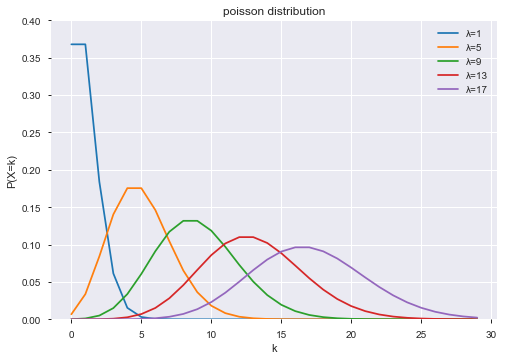

In [ ]:
import numpy as np,matplotlib.pyplot as plt,math
# lam= 一定時間のくる確率 / k  = 一定時間
for lam in range(1,21,4):
    plt.ylim((0,0.4))
    po,x=[],[]    
    for k in range(0,30,1):
        po.append(np.exp(-lam)*lam**k/math.factorial(k))     
        x.append(k)
    plt.plot(x,po,label="λ={}".format(lam))
plt.xlabel("k")
plt.legend(loc="best")    #凡例を表示
plt.ylabel("P(X=k)")
plt.title("poisson distribution")
plt.show()

In [ ]:
df["label_none"].rolling(window=30).mean()


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
          ...   
4905    0.466667
4906    0.500000
4907    0.500000
4908    0.466667
4909    0.466667
4910    0.433333
4911    0.466667
4912    0.466667
4913    0.466667
4914    0.433333
4915    0.400000
4916    0.366667
4917    0.366667
4918    0.400000
4919    0.400000
4920    0.400000
4921    0.366667
4922    0.366667
4923    0.333333
4924    0.333333
4925    0.333333
4926    0.300000
4927    0.300000
4928    0.333333
4929    0.300000
4930    0.300000
4931    0.266667
4932    0.2666

In [ ]:
#df["label_up"].rolling(window=30).mean()

#df["label_down"].rolling(window=30).mean()
lam=df["label_none"].rolling(window=30).mean()

po=np.exp(-lam)*lam